In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

K_a0 = 1.38629436112
K_a1 = 0.09666344259
K_a2 = 0.03590092383
K_a3 = 0.03742563713
K_a4 = 0.01451196212

K_b0 = 0.5
K_b1 = 0.12498593597
K_b2 = 0.06880248576
K_b3 = 0.03328355346
K_b4 = 0.00441787012

E_a1 = 0.44325141463
E_a2 = 0.06260601220
E_a3 = 0.04757383546
E_a4 = 0.01736506451

E_b1 = 0.24998368310
E_b2 = 0.09200180037
E_b3 = 0.04069697526
E_b4 = 0.00526449639

def K(m):
    m1 = 1 - m**2
    return (K_a0 + K_a1*m1 + K_a2*m1**2 + K_a3*m1**3 + K_a4*m1**4) + (K_b0 + K_b1*m1 + K_b2*m1**2 + K_b3*m1**3 + K_b4*m1**4)*math.log(1/m1)

def E(m):
    m1 = 1 - m**2
    return (1 + E_a1*m1 + E_a2*m1**2 + E_a3*m1**3 + E_a4*m1**4) + (E_b1*m1 + E_b2*m1**2 + E_b3*m1**3 + E_b4*m1**4)*math.log(1/m1)

def D(m):
    m2 = math.sqrt(1-m**2)
    lamb = math.log(4/m2)
        
    #if abs(K(m) - E(m)) > 1e-6:
    return (K(m) - E(m))/m**2
    #else:
    #    return lamb - 1 + 3/4*(lamb - 4/3)*m2**2 + 45/64*(lamb - 41/30)*m2**4 

print(K(1e-3)) 
print(E(1e-3))     
print(D(1e-5))    

1.570796719490016
1.5707959341016782
0.6853984046983895


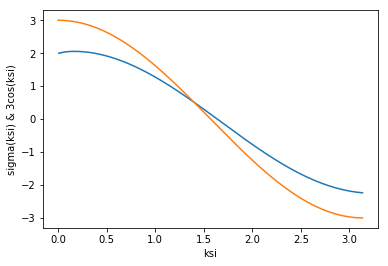

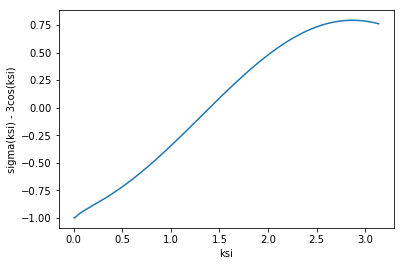

In [2]:
epsilon = 0.0001
n = 500
k = 0.1

ksi = np.arange(0, math.pi, math.pi/n)
sigma = np.arange(n, dtype=float)


for l in range (n):
    #sigma[l] = 3*math.cos(ksi[l])
    sigma[l] = 0
    
def r(i):
    return ksi[i] - k*ksi[i]**2/2

def r_ksi(i):
    return 1 - k*ksi[i]
    
def z(i):
    return -1/k*((1-k*ksi[i])/2*math.sqrt(1 - (1 - k*ksi[i])**2) + 0.5*math.asin(1 - k*ksi[i]))
    
def z_ksi(i):
    return math.sqrt(1 - (1 - k*ksi[i])**2)


def a(i, j):
    return (r(i)*z_ksi(i) - z(i)*r_ksi(i) + z(j)*r_ksi(i))*r(j)
    
def b(i, j):
    return r(j)**2*z_ksi(i)

def c(i, j):
    return r(i)**2 + r(j)**2 + (z(i) - z(j))**2

def d(i, j):
    return 2*r(i)*r(j)
    
def K_0(i, j):
    param = math.sqrt(abs(2*d(i, j)/(c(i, j)+d(i, j))))
    if i == 0 and j == 0:
        return 2*math.pi
    if abs(c(i, j) - d(i, j)) < epsilon or d(i,j) < epsilon or (c(i,j) + d(i,j)) < epsilon:
        return 0
    else:
        Ef = E(param)
        D = K(param) - E(param)
        return 4/math.sqrt(abs(c(i, j)+d(i, j)))*(b(i, j)/d(i, j)*D + (a(i, j)-b(i, j))/(c(i, j)-d(i, j))*Ef)
        #K(math.sqrt(abs(2*d(i, j)/(c(i, j)+d(i, j)))))
    
sigmaa = np.arange(n, dtype=float)    
#print(sigmaa)

for i in range(n):
    sigmaa[i] = 0
    sigmaa[0] = 0.5
    for j in range(n):
        if i != j:
            #print(i,j, K_0(i, j))
            sigmaa[i] += sigma[j]*math.pi/(n-1)*K_0(i,j)/4/math.pi


        sigma[i] = 2*(math.cos(ksi[i]) + sigmaa[i])

#print(sigmaa)
#print(sigma)
    
cos_arr = np.arange(n, dtype=float)
for m in range(n):
    cos_arr[m] = 3*math.cos(ksi[m])


plt.plot(ksi[1:], sigma[1:])

plt.plot(ksi[:], cos_arr[:])
plt.xlabel(u'ksi')
plt.ylabel(u'sigma(ksi) & 3cos(ksi)')

plt.show()

plt.plot(ksi[1:], sigma[1:] - cos_arr[1:])
plt.xlabel(u'ksi')
plt.ylabel(u'sigma(ksi) - 3cos(ksi)')

plt.show()

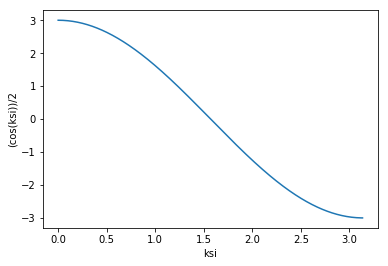

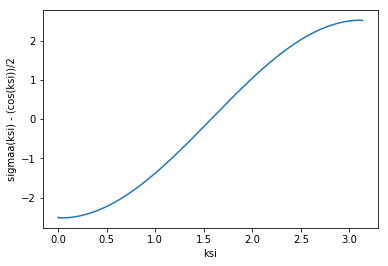

In [4]:
plt.plot(ksi[:], cos_arr[:])
plt.xlabel(u'ksi')
plt.ylabel(u'(cos(ksi))/2')

plt.show()

plt.plot(ksi[:], sigmaa[:] - cos_arr[:])
plt.xlabel(u'ksi')
plt.ylabel(u'sigmaa(ksi) - (cos(ksi))/2')

plt.show()

In [95]:
x, y = ksi[:], sigmaa(ksi[:])

plt.plot(x, y)
plt.xlabel(u'ksi')
plt.ylabel(u'sigma(ksi)')

#plt.show()

plt.plot(ksi[:], sigmaa[:] - 3*math.cos(ksi[i]))
plt.xlabel(u'ksi')
plt.ylabel(u'sigma(ksi) - 3cos(ksi)')

plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [41]:
a(ksi[i], ksi[j]) = (-math.sin(ksi[i])*math.sin(ksi[j]) - (math.cos(ksi[i]))**2 + math.cos(ksi[i])*math.cos(ksi[j]))*math.sin(ksi[j])
b(ksi[i], ksi[j]) = (math.sin(ksi[j]))**2*math.sin(ksi[i])
c(ksi[i], ksi[j]) = (math.sin(ksi[i]))**2 + (math.sin(ksi[j]))**2 + (-math.cos(ksi[i]) + math.cos(ksi[j]))**2
d(ksi[i], ksi[j]) = -2*math.sin(ksi[i])*math.sin(ksi[j])
K_0(ksi[i], ksi[j]) = 4/math.sqrt(c+d)*(b/d*(K(math.sqrt(2*d/(c+d))) - E(math.sqrt(2*d/(c+d)))) + (a+b)/(c-d)*E(math.sqrt(2*d/(c+d))))


SyntaxError: can't assign to function call (<ipython-input-41-78f4b0261f5e>, line 1)

In [15]:
1/2.


0.5

In [24]:
capital = {'Russia': 'Moscow',
           'China': 'Honkong'}
print(capital)
capital.
capital['Russia']

{'Russia': 'Moscow', 'China': 'Honkong'}


'Moscow'

In [58]:
def K(k):
    k1 = math.sqrt(1-k**2)
    lamb = math.log(4/k1)
    return lamb + (lamb-1)/4*k1**2 + 9/64*(lamb - 7/6)*k1**4

def E(k):
    k1 = math.sqrt(1-k**2)
    lamb = math.log(4/k1)
    return 1 + 1/2*(lamb-1/2)*k1**2 + 3/16*(lamb-13/12)*k1**4

def D(k):
    k1 = math.sqrt(1-k**2)
    lamb = math.log(4/k1)
        
    if abs(K(k) - E(k)) > 0.001:
        return (K(k) - E(k))/k**2
    else:
        return lamb - 1 + 3/4*(lamb - 4/3)*k1**2 + 45/64*(lamb - 41/30)*k1**4 


print(K(0.1)) 
print(E(0.1))  
print(D(0.1))

1.5191342442633027
1.4978014050815776
2.1332839181725123
